In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sig = np.load('test_all_leads.npy')
sig.shape

(6, 4000)

In [4]:
from monai.transforms.signal.array import SignalResample

In [26]:
tfs = SignalResample(method='interpolation')

In [27]:
tfs_sig = tfs(sig)
tfs_sig.shape

(6, 2000)

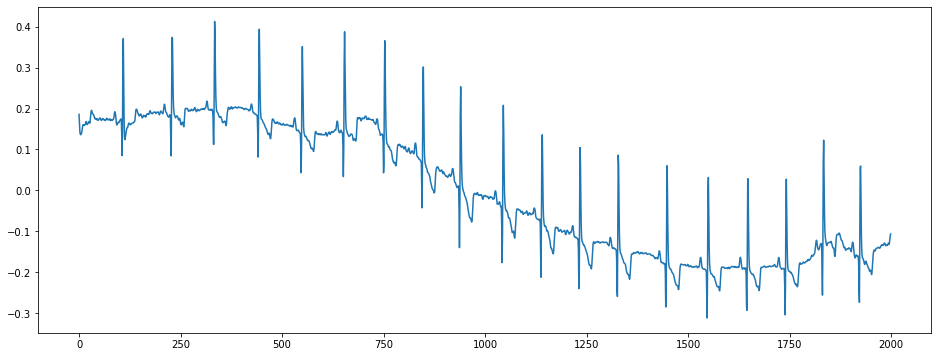

In [28]:
plt.figure(figsize=(16,6))
plt.plot(tfs_sig[0,:])

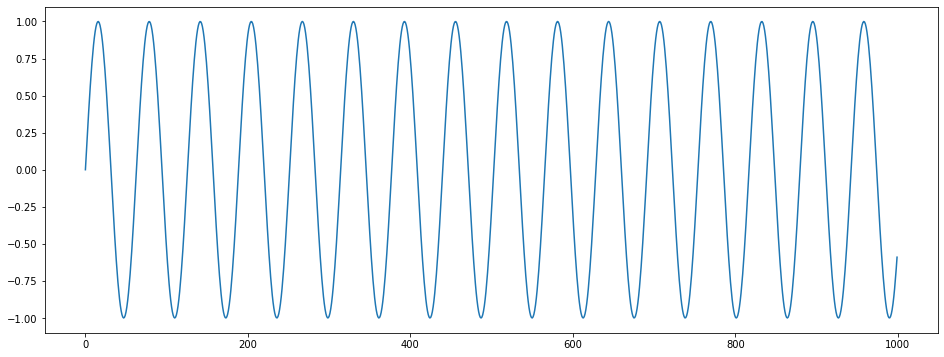

In [130]:
plt.figure(figsize=(16,6))
plt.plot([np.math.sin(x) for x in np.arange(0,100,0.1)])

In [24]:
%%writefile test_signal.py
from parameterized import parameterized
import unittest
import numpy as np
from monai.transforms.signal.array import SignalResample

VALID_CASES = [('interpolation',500,250,2000),('poly',500,250,2000)]
INVALID_CASES = [('wrongmethod',500,250,ValueError)]


class TestSignalResample(unittest.TestCase):
    
    def setUp(self):
        self.test_sig = np.array([np.math.sin(x) for x in np.arange(0,100,0.1)])
        
    @parameterized.expand(VALID_CASES)
    def test_correct_parameters(self,method,current_sample_rate,target_sample_rate,_):
        self.assertIsInstance(SignalResample(method,current_sample_rate,target_sample_rate),SignalResample)
   
    @parameterized.expand(VALID_CASES)
    def test_correct_results(self,method,current_sample_rate,target_sample_rate,length):
        
        self.assertAlmostEqual(len(SignalResample(method,current_sample_rate,target_sample_rate)(self.test_sig)),2000)
    
if __name__ == '__main__':
    unittest.main()

Overwriting test_signal.py


In [25]:
!python ~/NextGen/ANTECH/MONAI/test_signal.py -v

test_correct_parameters_0_interpolation (__main__.TestSignalResample) ... ok
test_correct_parameters_1_poly (__main__.TestSignalResample) ... ok
test_correct_results_0_interpolation (__main__.TestSignalResample) ... FAIL
test_correct_results_1_poly (__main__.TestSignalResample) ... ERROR

ERROR: test_correct_results_1_poly (__main__.TestSignalResample)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/doursand/opt/anaconda3/envs/monai/lib/python3.8/site-packages/parameterized/parameterized.py", line 533, in standalone_func
    return func(*(a + p.args), **p.kwargs)
  File "/Users/doursand/NextGen/ANTECH/MONAI/test_signal.py", line 22, in test_correct_results
    self.assertAlmostEqual(len(SignalResample(method,current_sample_rate,target_sample_rate)(self.test_sig)),2000)
  File "/Users/doursand/NextGen/ANTECH/MONAI/monai/transforms/signal/array.py", line 65, in __call__
    signal = np.stack([resample_poly(signal[i,